In [1]:
import pickle
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use("ggplot")

In [2]:
dataset = pickle.load( open( "dataset_alphabay.p", "rb" ) )
pprint(dataset[0].keys())
pprint(len(dataset)) # 8376 listings in dir

dict_keys(['country', 'category', 'description', 'price', 'title', 'soldby'])
5583


In [3]:
data=[]
for x in dataset:
    data.append(x.get("category"))
pprint(set(data))

{'CardedItems/Clothing/',
 'CardedItems/Digital/',
 'CardedItems/Electronics/',
 'CardedItems/Other/',
 'CounterfeitItems/Clothing/',
 'CounterfeitItems/Electronics/',
 'CounterfeitItems/FakeIDs/',
 'CounterfeitItems/Jewelry/',
 'CounterfeitItems/Money/',
 'CounterfeitItems/Other/',
 'DigitalProducts/E-Books/',
 'DigitalProducts/FraudSoftware/',
 'DigitalProducts/GameKeys/',
 'DigitalProducts/LegitSoftware/',
 'DigitalProducts/Other/',
 'Drugs&Chemicals/Benzos/',
 'Drugs&Chemicals/Cannabis&Hashish/',
 'Drugs&Chemicals/Dissociatives/',
 'Drugs&Chemicals/Ecstasy/',
 'Drugs&Chemicals/Opioids/',
 'Drugs&Chemicals/Other/',
 'Drugs&Chemicals/Paraphernalia/',
 'Drugs&Chemicals/Prescription/',
 'Drugs&Chemicals/Psychedelics/',
 'Drugs&Chemicals/Steroids/',
 'Drugs&Chemicals/Stimulants/',
 'Drugs&Chemicals/Tobacco/',
 'Drugs&Chemicals/WeightLoss/',
 'Fraud/Accounts&BankDrops/',
 'Fraud/CVV&Cards/',
 'Fraud/Dumps/',
 'Fraud/Other/',
 'Fraud/PersonalInformation&Scans/',
 'Guides&Tutorials/Drugs/'

In [11]:
print("CATEGORY")
print(dataset[153].get("category"))
print("\n")
print("DESCRIPTION")
print(dataset[153].get("description"))

CATEGORY
Fraud/Accounts&BankDrops/


DESCRIPTION
Phone-verified, freshly made, US-based Google Voice accounts. Capable of making unlimited, free SMS as well as phone calls if credit is added to the account. The more you buy, the lower the cost.

All accounts are checked for working status before being shipped. Be sure to access the accounts from a clean, US-based IP to avoid the account being flagged. All recovery information is included with each account to ensure full access. I CANNOT provide specific area codes; you will be given a random US-based number.

Feedback from 120+ successful sales of this product on the now-defunct Evolution Marketplace can be seen here: [URL]http://grams7enufi7jmdl.onion/infodesk/vendor/0x61A1DCFA47F0A511[/URL]

Account information comes in the following format:

First Name - Last Name - Email - Password - Recovery Phone # - Recovery Email - Google Voice #



NOTE: If you have any issues with any purchased accounts, please contact me via PM before leavin

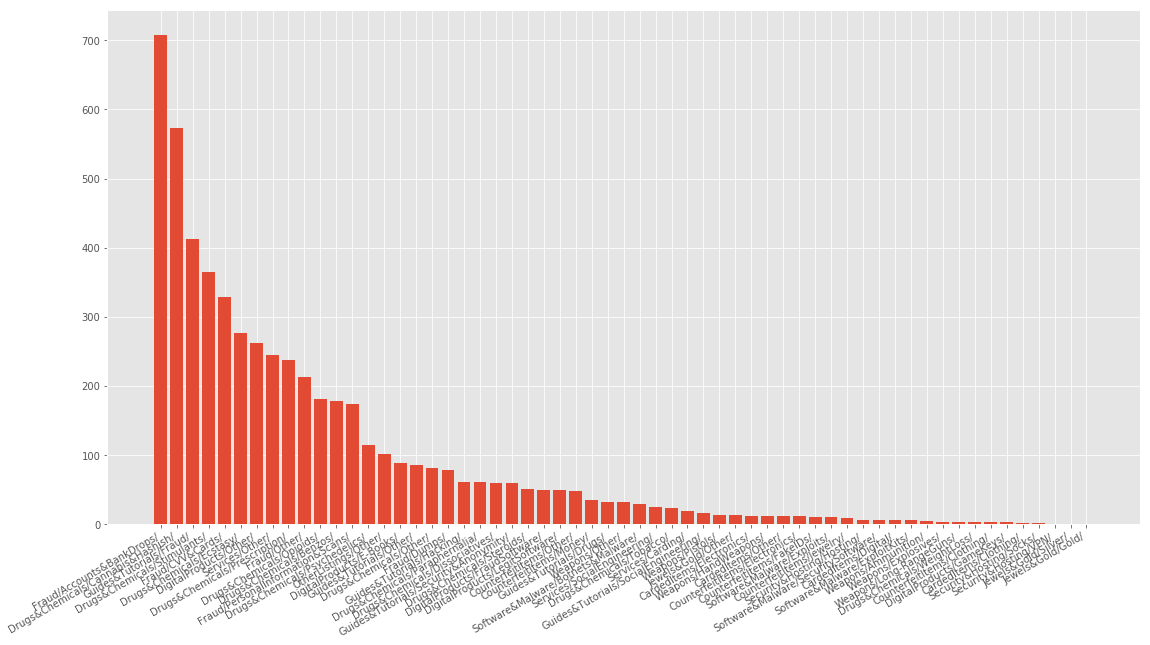

In [5]:
data={}
for x in dataset:
    try:
        data[x.get("category")] += 1
    except:
        data[x.get("category")] = 0

d_key = [k for k in sorted(data, key=lambda k: data[k], reverse=True)]
d_val = [data.get(k) for k in d_key]
    
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.bar(range(len(data)), d_val, align='center')
plt.xticks(range(len(data)), d_key)
fig.autofmt_xdate()
plt.show()


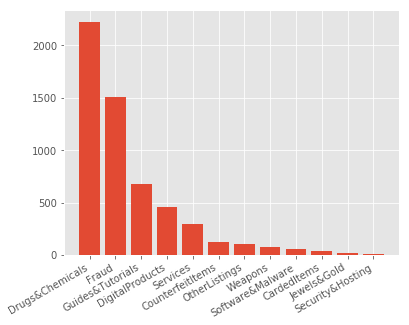

In [6]:
data={}
for x in dataset:
    try:
        cat = x.get("category").split("/")[0]
        data[cat] += 1
    except:
        cat = x.get("category").split("/")[0]
        data[cat] = 0
        
d_key = [k for k in sorted(data, key=lambda k: data[k], reverse=True)]
d_val = [data.get(k) for k in d_key]
    
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 5)
plt.bar(range(len(data)), d_val, align='center')
plt.xticks(range(len(data)), d_key)
fig.autofmt_xdate()
plt.show()

In [7]:
from langdetect import detect,detect_langs
from tqdm import tqdm

data={}
for x in tqdm(dataset):
    try:
        cat = detect(x.get("description"))
        data[cat] += 1
    except:
        cat = detect(x.get("description"))
        data[cat] = 1
print(data) # ~90% english

100%|██████████| 5583/5583 [00:53<00:00, 103.98it/s]

{'cs': 0, 'es': 41, 'sl': 2, 'bn': 60, 'fr': 62, 'fi': 0, 'sk': 0, 'so': 21, 'cy': 10, 'vi': 3, 'af': 11, 'lv': 0, 'pl': 14, 'hr': 1, 'sv': 15, 'ro': 16, 'tl': 14, 'it': 27, 'en': 5015, 'no': 11, 'de': 91, 'sq': 3, 'nl': 9, 'da': 24, 'ca': 60, 'id': 7, 'pt': 0, 'et': 9}


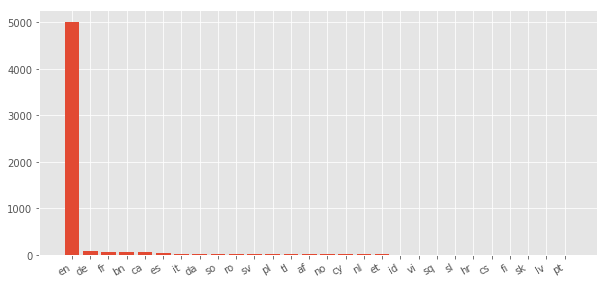

In [9]:
d_key = [k for k in sorted(data, key=lambda k: data[k], reverse=True)]
d_val = [data.get(k) for k in d_key]
    
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 5)
plt.bar(range(len(data)), d_val, align='center')
plt.xticks(range(len(data)), d_key)
fig.autofmt_xdate()
plt.show()